In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix

In [2]:
df=pd.read_csv(r"C:\Users\barho\Downloads\archive (22)\train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

for i in df.select_dtypes(include='number').columns:
    df[i]=impute.fit_transform(df[[i]])


In [9]:
df=df.dropna()

In [10]:
df['Loan_Status'] = df['Loan_Status'].replace({'N': 0, 'Y': 1}).astype('Int64')


C:\Users\barho\AppData\Local\Temp\ipykernel_44896\2545448244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Status'] = df['Loan_Status'].replace({'N': 0, 'Y': 1}).astype('Int64')


In [11]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype('Int64')


C:\Users\barho\AppData\Local\Temp\ipykernel_44896\1101284683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0}).astype('Int64')


In [12]:
df.Married.value_counts()

Yes    362
No     192
Name: Married, dtype: int64

In [13]:
df['Married'] = df['Married'].replace({'No': 0, 'Yes': 1}).astype('Int64')


C:\Users\barho\AppData\Local\Temp\ipykernel_44896\2635227575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married'] = df['Married'].replace({'No': 0, 'Yes': 1}).astype('Int64')


In [14]:
df.Self_Employed.value_counts()

No     478
Yes     76
Name: Self_Employed, dtype: int64

In [15]:
df['Self_Employed'] = df['Self_Employed'].replace({'No': 0, 'Yes': 1}).astype('Int64')


C:\Users\barho\AppData\Local\Temp\ipykernel_44896\438984748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Self_Employed'] = df['Self_Employed'].replace({'No': 0, 'Yes': 1}).astype('Int64')


In [16]:
df['Education'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1}).astype(int)


C:\Users\barho\AppData\Local\Temp\ipykernel_44896\229705489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1}).astype(int)


In [17]:
df=df.replace(to_replace='3+',value=4)

In [18]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
403,LP002300,0,0,0,0,0,1963.0,0.0,53.0,360.0,1.0,Semiurban,1


In [19]:
df['Dependents'] = df['Dependents'].astype(int)


In [20]:
df['Property_Area'] = df['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2}).astype(int)


In [21]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
272,LP001892,1,0,0,1,0,2833.0,1857.0,126.0,360.0,1.0,0,1
194,LP001664,1,0,0,1,0,4191.0,0.0,120.0,360.0,1.0,0,1
520,LP002689,1,1,2,0,0,2192.0,1742.0,45.0,360.0,1.0,1,1
147,LP001518,1,1,1,1,0,1538.0,1425.0,30.0,360.0,1.0,2,1
152,LP001531,1,0,0,1,0,9166.0,0.0,244.0,360.0,1.0,2,0
512,LP002643,1,1,2,1,0,3283.0,2035.0,148.0,360.0,1.0,2,1
472,LP002519,1,1,4,1,0,4691.0,0.0,100.0,360.0,1.0,1,1
178,LP001616,1,1,1,1,0,3750.0,0.0,116.0,360.0,1.0,1,1
326,LP002068,1,0,0,1,0,4917.0,0.0,130.0,360.0,0.0,0,1
362,LP002175,1,1,0,1,0,4750.0,2333.0,130.0,360.0,1.0,2,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            554 non-null    object 
 1   Gender             554 non-null    Int64  
 2   Married            554 non-null    Int64  
 3   Dependents         554 non-null    int32  
 4   Education          554 non-null    int32  
 5   Self_Employed      554 non-null    Int64  
 6   ApplicantIncome    554 non-null    float64
 7   CoapplicantIncome  554 non-null    float64
 8   LoanAmount         554 non-null    float64
 9   Loan_Amount_Term   554 non-null    float64
 10  Credit_History     554 non-null    float64
 11  Property_Area      554 non-null    int32  
 12  Loan_Status        554 non-null    Int64  
dtypes: Int64(4), float64(5), int32(3), object(1)
memory usage: 56.3+ KB


C:\Users\barho\AppData\Local\Temp\ipykernel_44896\3648873261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

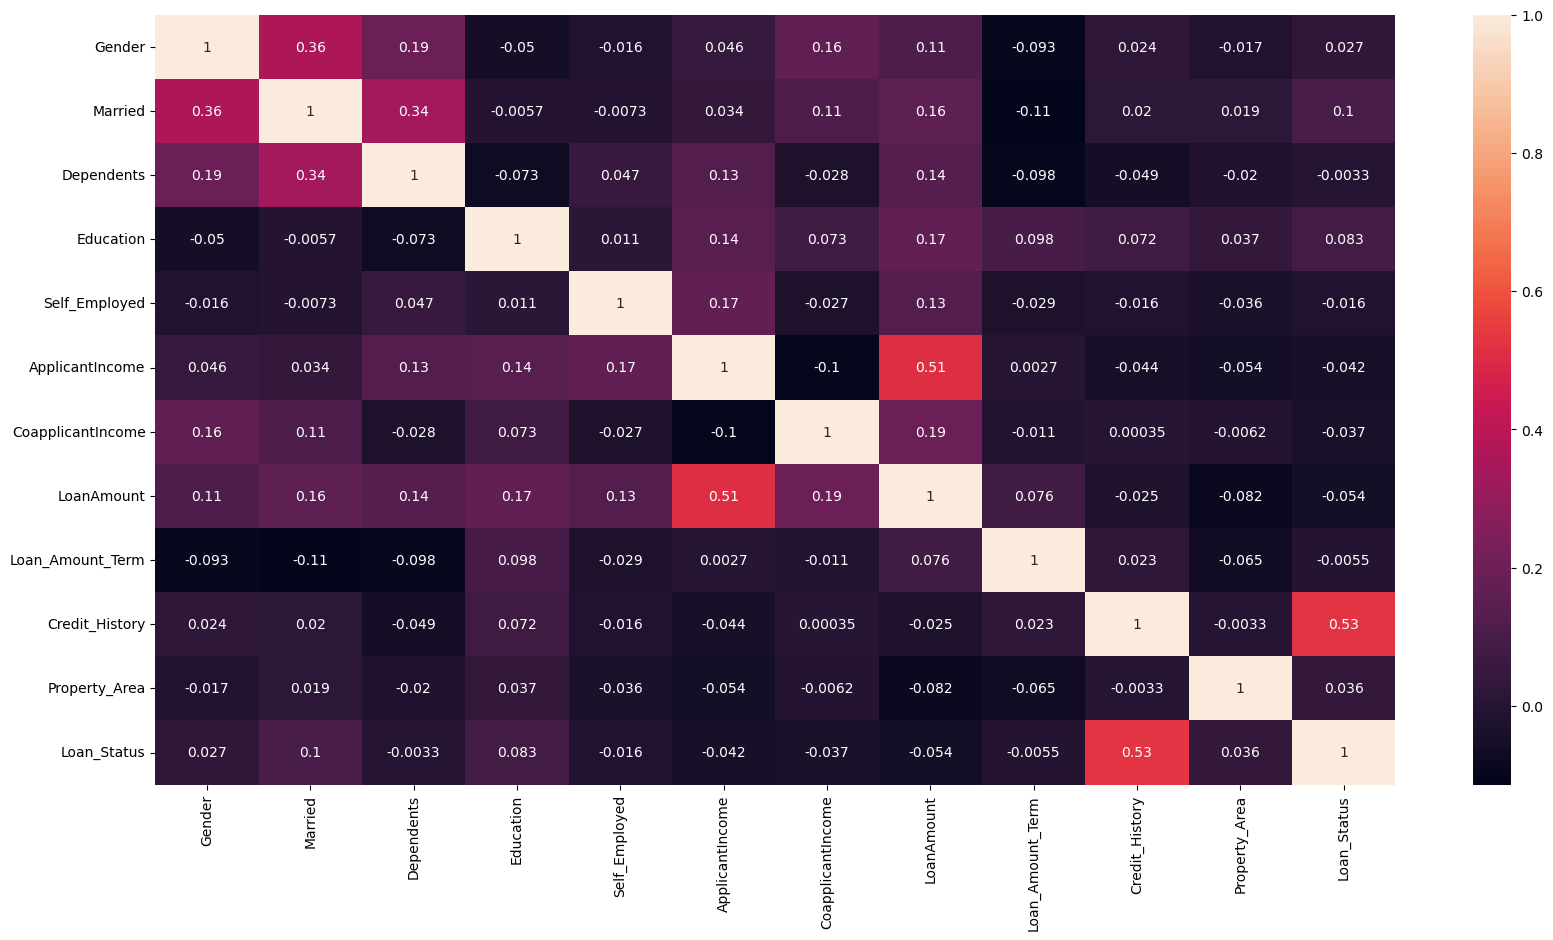

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

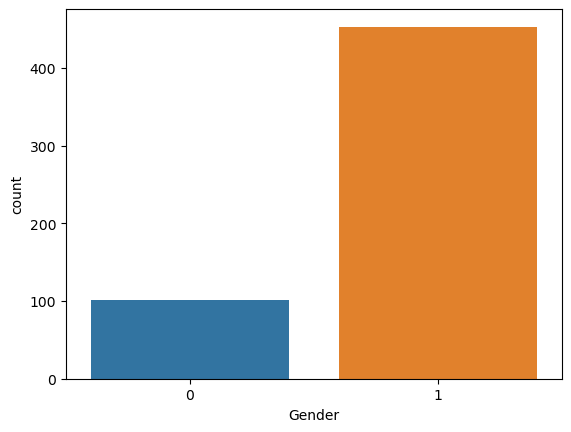

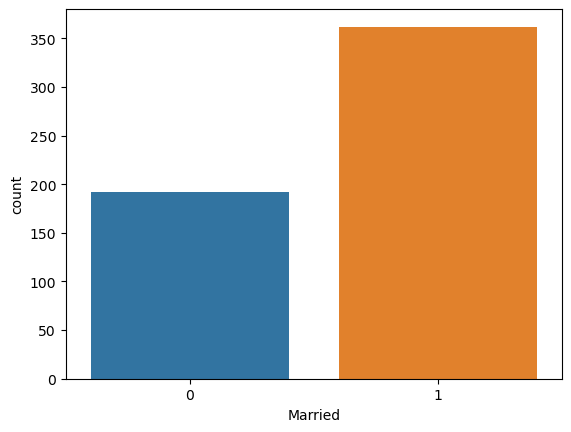

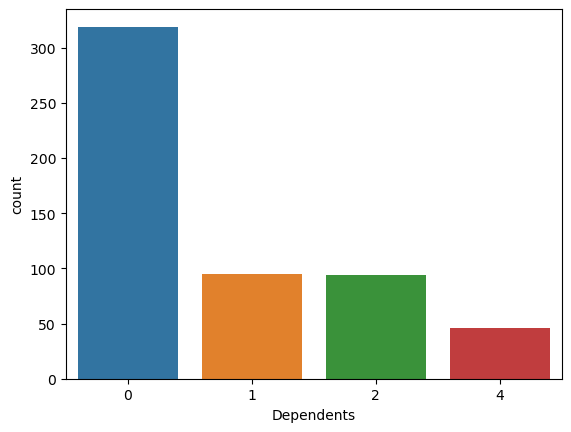

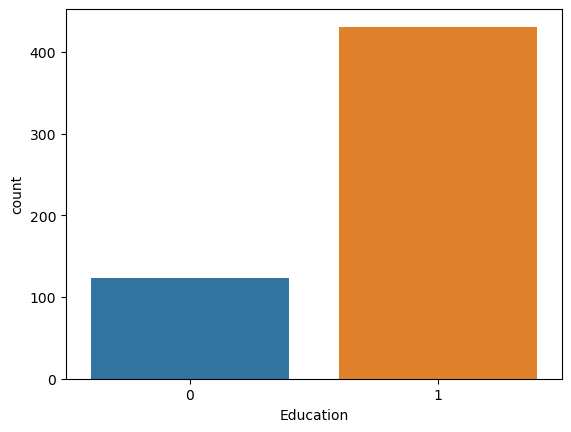

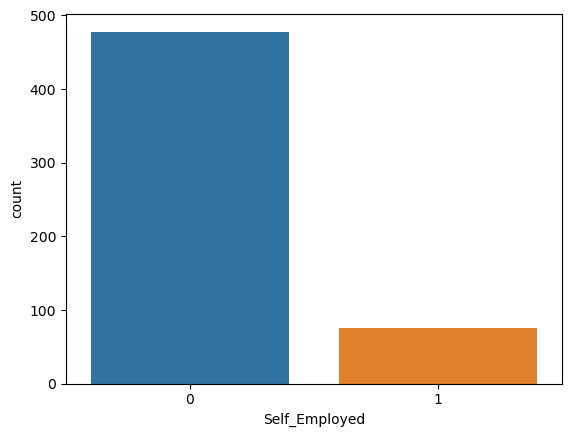

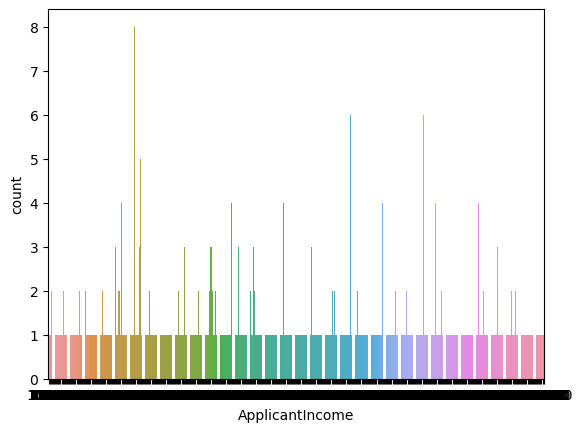

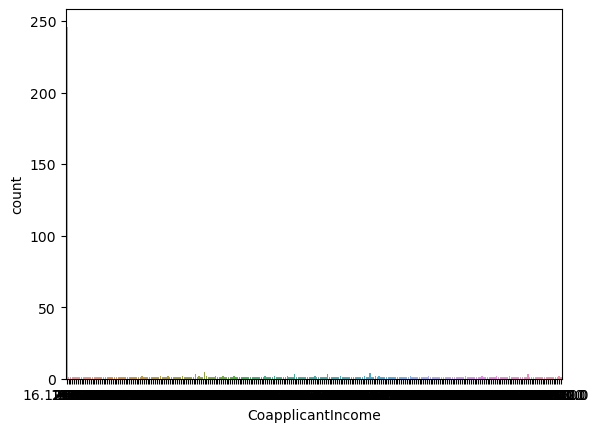

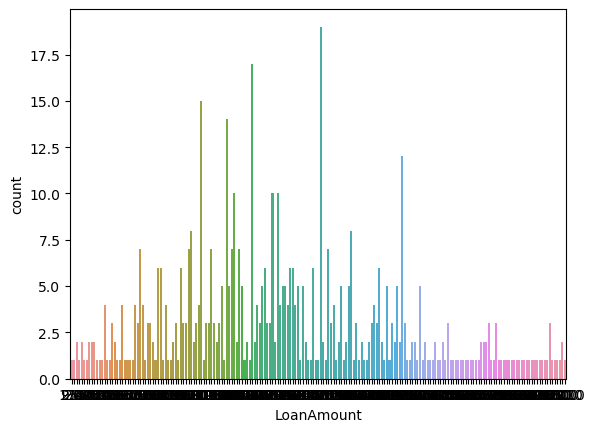

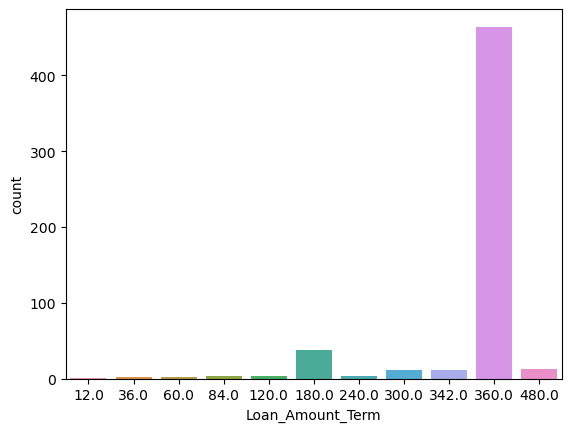

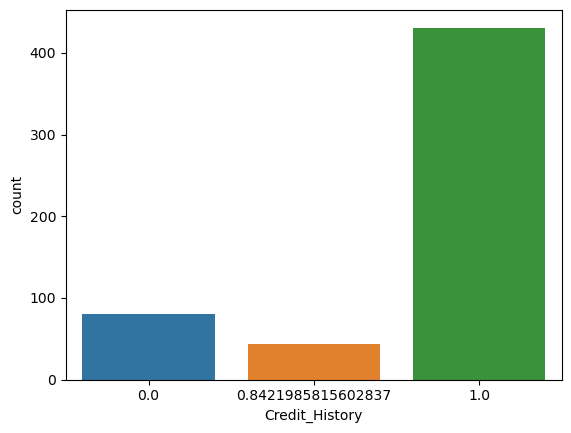

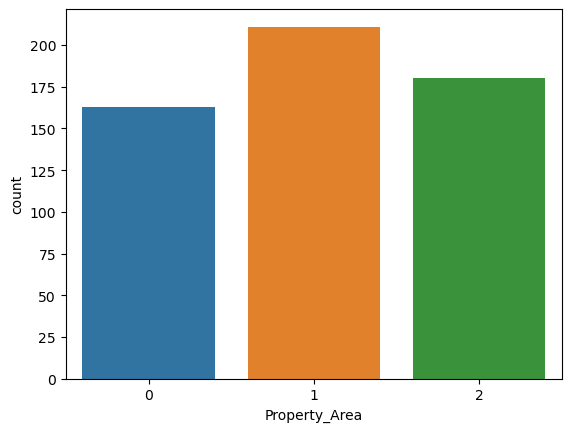

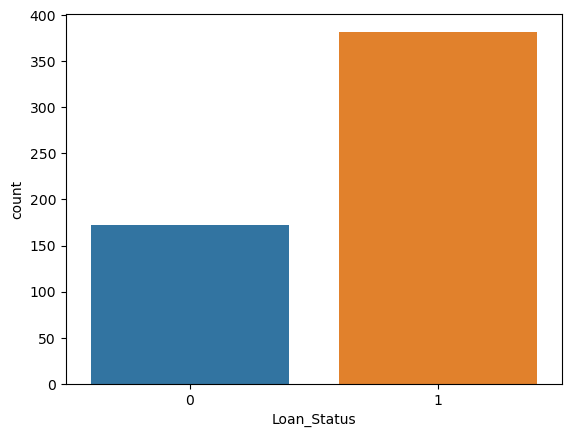

In [24]:
for i in df.select_dtypes(include='number').columns:
    sns.countplot(data=df,x=i)
    plt.show()

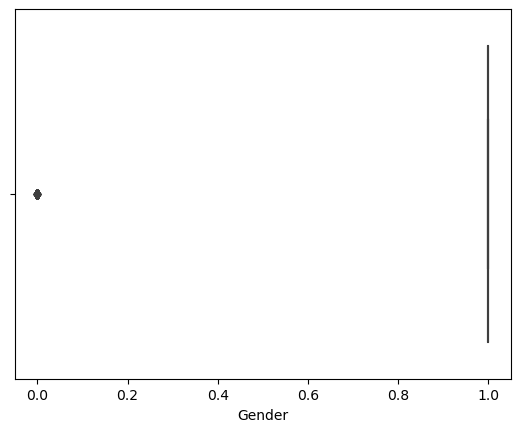

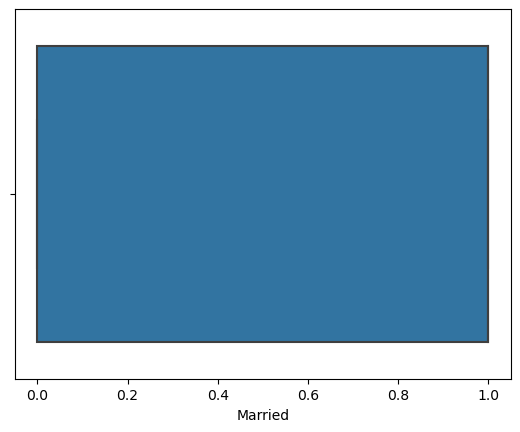

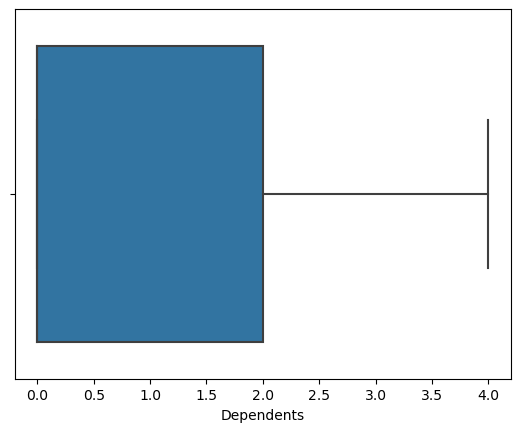

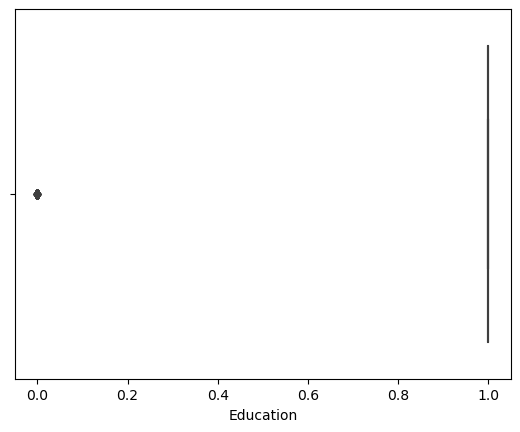

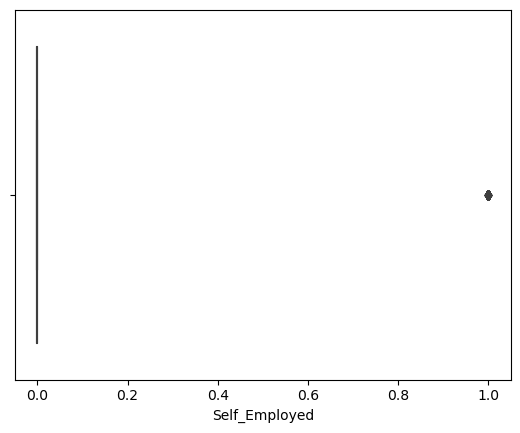

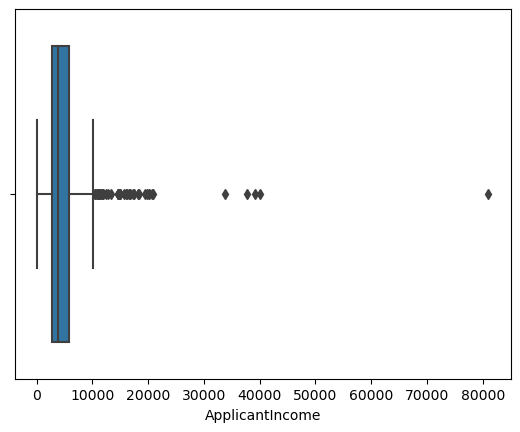

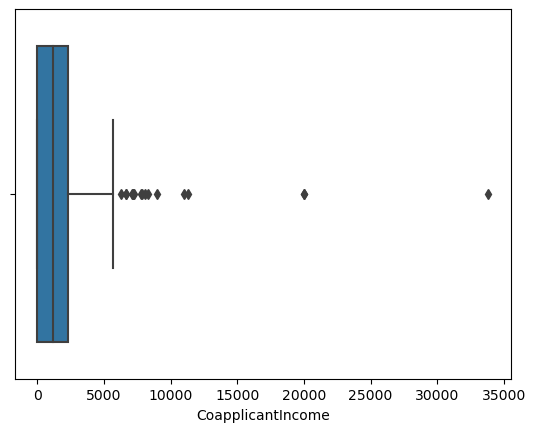

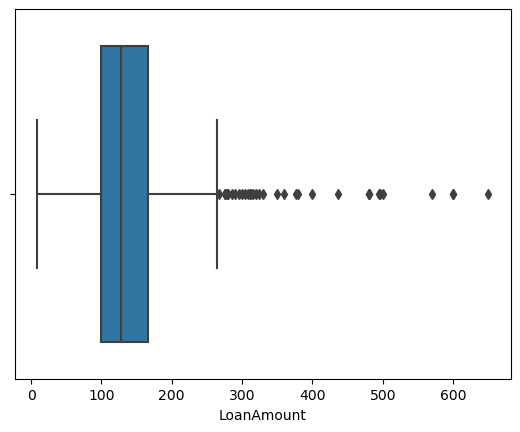

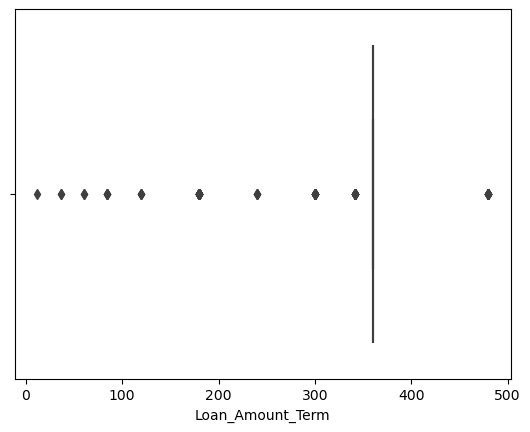

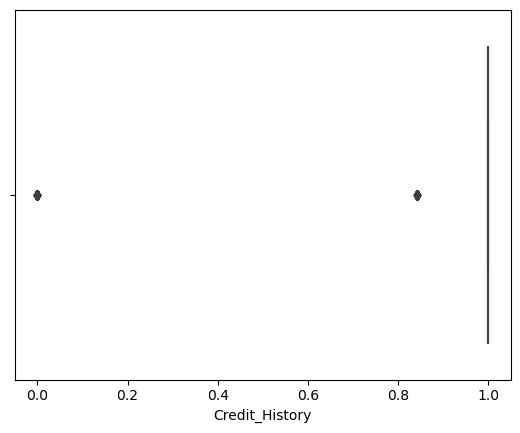

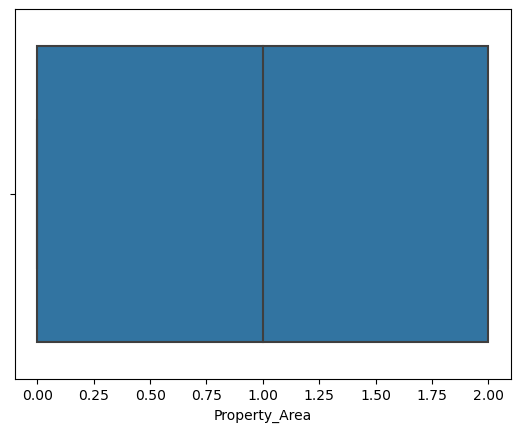

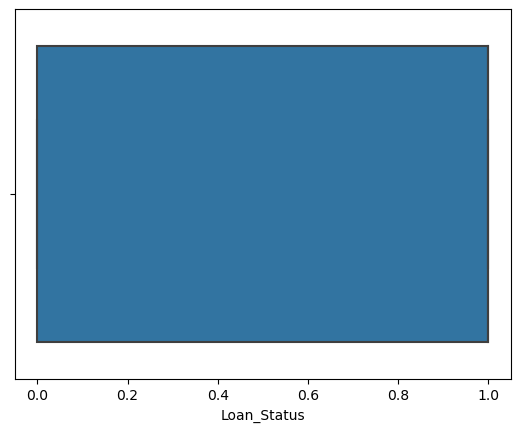

In [25]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [26]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
x=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=42)

In [29]:
model1=RandomForestClassifier()
model2=DecisionTreeClassifier()
model3=LogisticRegression()

from sklearn.svm import SVC

model4=SVC()

RandomForestClassifier()
accuracy is: 100.00% ,recall is 1.0, f1 is 1.0


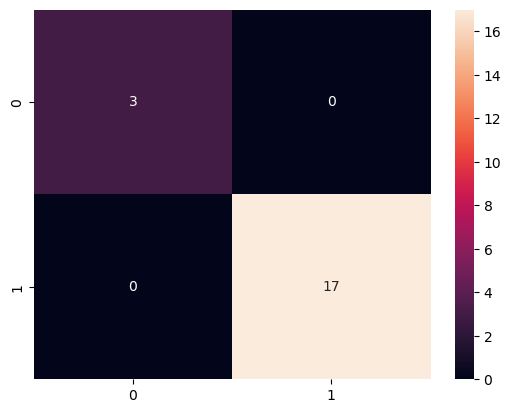

In [30]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    
    
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1= f1_score(pre,y_test)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print(f'accuracy is: {accuracy*100:.2f}% ,recall is {recall}, f1 is {f1}')
cal(model1)

DecisionTreeClassifier()
accuracy is: 70.00% ,recall is 1.0, f1 is 0.7857142857142858


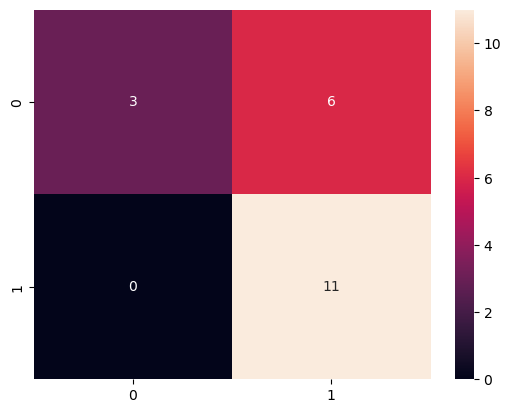

In [31]:
cal(model2)

C:\Users\barho\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
accuracy is: 100.00% ,recall is 1.0, f1 is 1.0


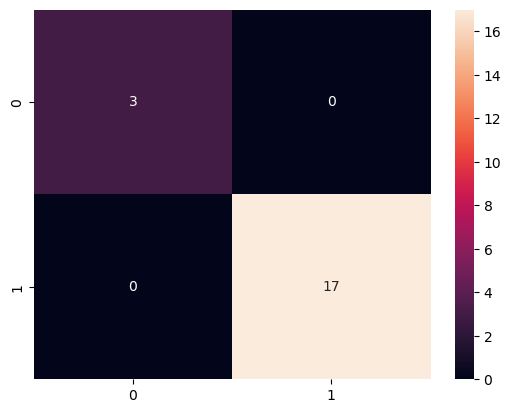

In [32]:
cal(model3)

SVC()
accuracy is: 85.00% ,recall is 0.85, f1 is 0.9189189189189189


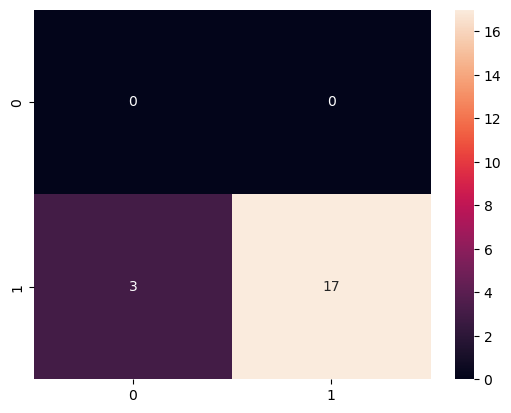

In [33]:
cal(model4)